# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [40]:
# Your code here

import pandas as pd

data = pd.read_csv(r'C:\Users\te_sa\Downloads\archive (4)\PS_20174392719_1491204439457_log.csv').sample(100000)

In [41]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4502222,325,CASH_OUT,117309.89,C2058897970,0.00,0.00,C1166274671,640473.25,757783.13,0,0
3590584,262,PAYMENT,11099.68,C953638783,11393.00,293.32,M2127935743,0.00,0.00,0,0
1050700,95,TRANSFER,511610.20,C1349438156,0.00,0.00,C881248715,1650789.99,2162400.18,0,0
3530600,259,CASH_OUT,187961.90,C968493153,0.00,0.00,C1745413236,1583719.98,1771681.87,0,0
5057604,354,PAYMENT,14081.14,C1509586836,347552.65,333471.51,M1633693479,0.00,0.00,0,0


### What is the distribution of the outcome? 

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  100000.000000  1.000000e+05   1.000000e+05    1.000000e+05   
mean      243.939760  1.838990e+05   8.404689e+05    8.617438e+05   
std       142.360537  6.185888e+05   2.907562e+06    2.943799e+06   
min         1.000000  6.800000e-01   0.000000e+00    0.000000e+00   
25%       156.000000  1.358061e+04   0.000000e+00    0.000000e+00   
50%       249.000000  7.546460e+04   1.442150e+04    0.000000e+00   
75%       345.000000  2.095180e+05   1.073009e+05    1.437758e+05   
max       741.000000  3.973488e+07   3.614984e+07    3.618472e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    1.000000e+05    1.000000e+05  100000.000000        100000.0  
mean     1.102237e+06    1.231453e+06       0.001210             0.0  
std      3.475094e+06    3.803698e+06       0.034764             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00  

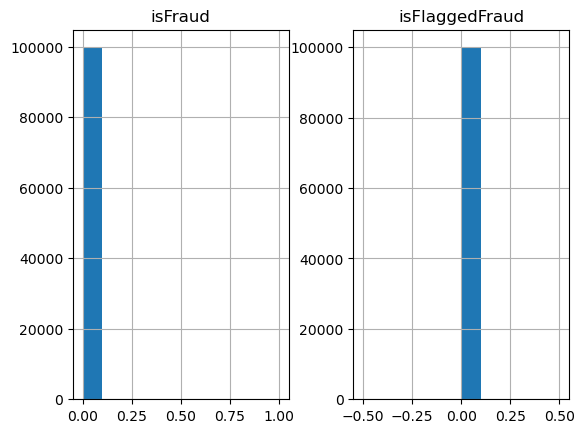

In [42]:
# Your response here

print(data.describe())

import matplotlib.pyplot as plt

data[['isFraud','isFlaggedFraud']].hist()
plt.show()

In [43]:
data['isFraud'].value_counts()

0    99879
1      121
Name: isFraud, dtype: int64

In [44]:
data['isFlaggedFraud'].value_counts()

0    100000
Name: isFlaggedFraud, dtype: int64

In [45]:
data['nameOrig'].value_counts()

C1138522237    2
C726867603     1
C1803720335    1
C1514384663    1
C58447213      1
              ..
C481633682     1
C756551697     1
C1066157156    1
C1473348877    1
C1872468674    1
Name: nameOrig, Length: 99999, dtype: int64

In [46]:
##features : step, type,amount,oldbalanceOrg, newbalanceOrig, oldbalanceDest,	newbalanceDest

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [47]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [48]:
data=pd.get_dummies(data,columns=['type'])

In [49]:
# Your code here

data['step'].describe()

##will transform it to days


count    100000.000000
mean        243.939760
std         142.360537
min           1.000000
25%         156.000000
50%         249.000000
75%         345.000000
max         741.000000
Name: step, dtype: float64

In [50]:
data['step']=data['step']/24

In [51]:
data['step'].describe()

count    100000.000000
mean         10.164157
std           5.931689
min           0.041667
25%           6.500000
50%          10.375000
75%          14.375000
max          30.875000
Name: step, dtype: float64

### Run a logisitc regression classifier and evaluate its accuracy.

In [52]:
data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4502222,13.541667,117309.89,C2058897970,0.00,0.00,C1166274671,640473.25,757783.13,0,0,0,1,0,0,0
3590584,10.916667,11099.68,C953638783,11393.00,293.32,M2127935743,0.00,0.00,0,0,0,0,0,1,0
1050700,3.958333,511610.20,C1349438156,0.00,0.00,C881248715,1650789.99,2162400.18,0,0,0,0,0,0,1
3530600,10.791667,187961.90,C968493153,0.00,0.00,C1745413236,1583719.98,1771681.87,0,0,0,1,0,0,0
5057604,14.750000,14081.14,C1509586836,347552.65,333471.51,M1633693479,0.00,0.00,0,0,0,0,0,1,0


In [54]:
data.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [57]:
# Your code here

features = data[['step', 'amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest','type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER']]
label=data['isFraud']

display(features.head(3))
display(label.head(3))



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4502222,13.541667,117309.89,0.0,0.00,640473.25,757783.13,0,1,0,0,0
3590584,10.916667,11099.68,11393.0,293.32,0.00,0.00,0,0,0,1,0
1050700,3.958333,511610.20,0.0,0.00,1650789.99,2162400.18,0,0,0,0,1


4502222    0
3590584    0
1050700    0
Name: isFraud, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25)

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)

logistic.score(X_test, y_test)

0.99856

### Now pick a model of your choice and evaluate its accuracy.

In [62]:
# Your code here

from sklearn.neighbors import KNeighborsClassifier


##create empty model
knn=KNeighborsClassifier(n_neighbors=3)

##trainig the model
knn.fit(X_train,y_train)

knn.score(X_test, y_test)

0.99952

### Which model worked better and how do you know?

In [60]:
# Your response here

#the knn model worked slighly better but both have a high score

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.